# Splash Notebook for Mint Users

For any updates, see https://github.com/gusmacmurdo/splashpf.

This is a basic version to use with Mint.com transactions download.  It only looks at your Mint.com download file. 
You can customize this, as I am, to use with my other credit card processors and institutions, by adding CSV "adapter" to bring you data in, join it, auto-categorize.

# Instructions - Windows users

These instructions assume you downloaded from the github repo 2 files: 
- PersonalFin.pynb
- a sample unique_categories.csv

## Before you begin

- You should install Visual Code studio, then inside Visual code studio, install two extensions for Python and Jupyter notebook. this is the easiest way. 
- You want to create a folder where you will save your own Splash data and files.  Create a location like   'c:/users/<yourname>/mySplash
- Put the PersonalFin.pynb in that folder  (you don't need the unique _constraints.csv, because you'll make your own in the next step) 
- Start Visual code studio and open file>  PersonalFin notebook

## Preparation - 1 time setup

You will need to create your own 'unique-categoires.csv' and replace it with your own Mint categories you have used. I have a code block below to do this below.
Important - this is you should only do this once, as you don't need to recreate your categories every time from your Mint history. However if you start modifying this notebook, and adding new tranasactions, then you would at that point, because you're developping new data feeds to ingest (only if you're a developer modifying this). 




In [1]:
# You must set a year and a month you want to see some of  the graphics below to get current year and current month charts. 

yearIwanttolookat = 2023
monthIwanttolookat = '2023-09-01'

In [2]:
import pandas as pd

# Your mint.com transactions file you downloaded should be here.  The ~ just means  c:/user/<yourname>. 
file_path = '~/Downloads/transactions.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])




In [3]:
# THIS IS a 1 TIME mapping, don't run repeatedly unless you want to again 
# Extract unique categories and convert to DataFrame
# Save to CSV in your own folder

# UNCOMMENT these two lines to run the category extract from your Mint file


# unique_categories_df = pd.DataFrame(df['Category'].unique(), columns=['Category'])
# unique_categories_df.to_csv('unique_categories.csv', index=False)


## If you ran above and Generated your Unique categories, 

then feel free to comment out the above block or delete it. 

## Update your categories

Now assuming you have a 'unique_categories.csv' file, you will need to edit it. Look at my sample you may have downloaded at first.
You should provide a General Category column for each subcategory, so you can get a nice summary. I'd stick to 5-7 general categories only. 
Save your work, we'll read in the CSV file next. 

In [4]:
# Read the updated CSV with 'basic_expense_type'
categories_mapping_df = pd.read_csv('unique_categories.csv')


In [5]:
# Merge the original DataFrame with the new categories mapping
# This will match the 'Category' in 'df' with 'Category' in 'categories_mapping_df' and add the 'basic_expense_type'
df = df.merge(categories_mapping_df, on='Category', how='left')
df.columns = df.columns.str.replace(' ', '')


C:\Users\jamie\AppData\Local\Temp\ipykernel_14936\557605397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yr['GeneralCategory'] = df_yr['GeneralCategory'].str.strip().str.title()


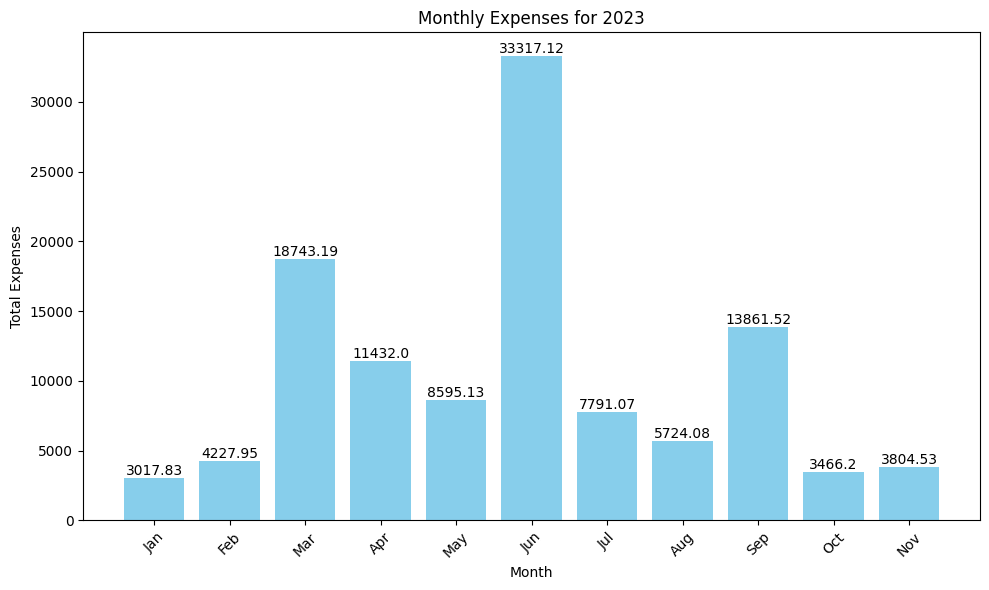

In [6]:
# for current year
df_yr = df[df['Date'].dt.year == yearIwanttolookat]
df_yr['GeneralCategory'] = df_yr['GeneralCategory'].str.strip().str.title()
df_yr = df_yr[df_yr['GeneralCategory'] != 'Income']
df_yr = df_yr[df_yr['GeneralCategory'] != 'Transfer']

monthly_expenses_yr = df_yr.groupby(df_yr['Date'].dt.month)['Amount'].sum()



import matplotlib.pyplot as plt
import calendar

# Create a bar plot for monthly expenses
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
monthly_expenses_yr.index = monthly_expenses_yr.index.map(lambda x: calendar.month_abbr[x])  # Map the month integers to abbreviations
bars = plt.bar(monthly_expenses_yr.index, monthly_expenses_yr.values, color='skyblue')

# Add titles and labels
plt.title('Monthly Expenses for {}'.format(yearIwanttolookat))
plt.xlabel('Month')
plt.ylabel('Total Expenses')

# Loop over the bars and add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate the month labels for better readability
plt.tight_layout()  # Adjust the padding of the plot
plt.show()


In [7]:
# For exact month 
import pandas as pd
import calendar

# Your start date as input (year, month, day)
start_date = pd.to_datetime(monthIwanttolookat)

# Find the last day of the month
_, last_day = calendar.monthrange(start_date.year, start_date.month)
end_date = pd.to_datetime(f"{start_date.year}-{start_date.month}-{last_day}")




# Create a mask to filter out transactions outside the desired date range
date_mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

# Apply the mask to your DataFrame
df = df[date_mask]

df['GeneralCategory'] = df['GeneralCategory'].str.strip().str.title()



df = df[df['GeneralCategory'] != 'Income']
filtered_transactions = df[df['GeneralCategory'] != 'Transfer']

total_expenses = filtered_transactions['Amount'].sum()
# Group by 'Category' and sum up the amounts
category_summary = filtered_transactions.groupby('GeneralCategory')['Amount'].sum()


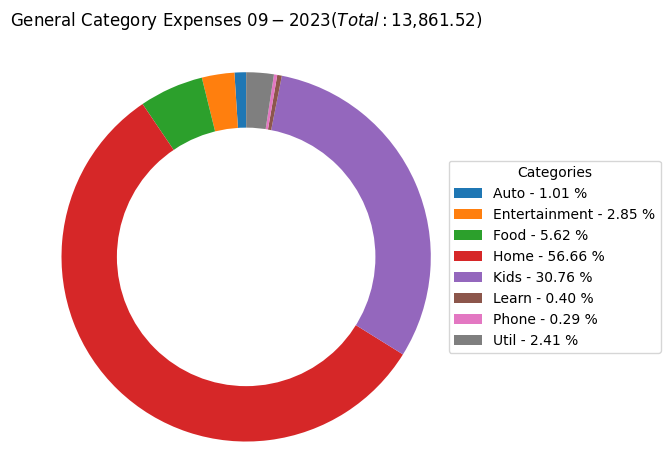

In [8]:
# no labels 2
import matplotlib.pyplot as plt


# Calculate the percentage for each category
percentages = 100 * category_summary / category_summary.sum()

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(category_summary, labels=None, startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
ax.set_title(f"General Category Expenses ${start_date.strftime('%m-%Y')} (Total: ${total_expenses:,.2f})", pad=20)


# Draw a circle at the center to turn the pie into a doughnut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Construct the legend labels with percentages
legend_labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(category_summary.index, percentages)]

# Add a legend with a title, place it on the side
plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


In [9]:
# Group by 'Category' and sum up the amounts
category_summary = filtered_transactions.groupby('Category')['Amount'].sum()



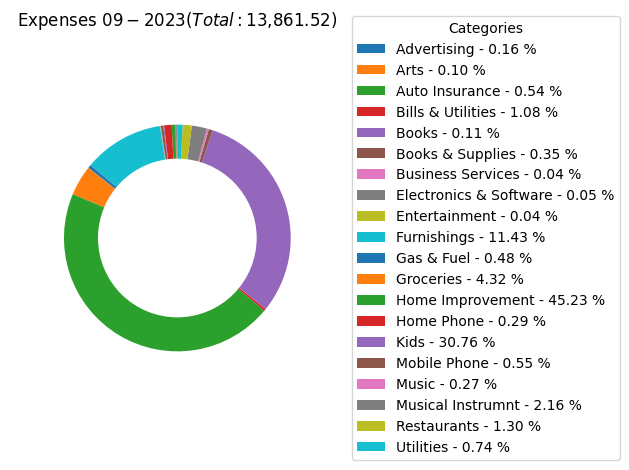

In [10]:

# Calculate the percentage for each category
percentages = 100 * category_summary / category_summary.sum()

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(category_summary, labels=None, startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
ax.set_title(f"Expenses ${start_date.strftime('%m-%Y')} (Total: ${total_expenses:,.2f})", pad=20)


# Draw a circle at the center to turn the pie into a doughnut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Construct the legend labels with percentages
legend_labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(category_summary.index, percentages)]

# Add a legend with a title, place it on the side
plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


## Top 10 expenses in order of highest to lowest

In [11]:
filtered_transactions.sort_values('Amount', ascending=False).head(10)

Date                        Description  \
119 2023-09-20             dummy   
138 2023-09-11                             dummy   
135 2023-09-11   asdfas   
103 2023-09-25      asdfa  
154 2023-09-05       Rasdf  
151 2023-09-05                          asdf   
160 2023-09-02  asdf   
130 2023-09-14    asd  
118 2023-09-20    LOWE'S OF CENTRAL RIRICHMOND VA   
152 2023-09-05                  asdf   

                   OriginalDescription   Amount TransactionType  \
119                              CHECK  5600.00           debit   
138        asdf 1681.85           debit   
135    MATTRESS WAREHOUSE #RICHMOND VA  1584.67           debit   
103                            DEPOSIT  1006.63          credit   
154       asdf  1000.00           debit   
151       asdf   574.77           debit   
160  asdf  300.00           debit   
130     PETE ROSE-XXX XX6845HENRICO VA   272.64           debit   
118    LOWE'S OF CENTRAL asdf   164.63           debit   
152        asdf  150.00           debit   

              Category           AccountName Labels        Notes  \
119   Home Improvement            Demand Dep    NaN  Roof repair   
138               Kids            Demand Dep    NaN          NaN   
135        Furnishings  Blue Cash Preferred®    NaN          NaN   
103               Kids            Demand Dep    NaN          NaN   
154               Kids            Demand Dep    NaN          NaN   
151               Kids            Demand Dep    NaN          NaN   
160  Musical Instrumnt  Blue Cash Preferred®    NaN          NaN   
130   Home Improvement  Blue Cash Preferred®    NaN          NaN   
118   Home Improvement  Blue Cash Preferred®    NaN          NaN   
152  Bills & Utilities            Demand Dep    NaN          NaN   

    GeneralCategory  
119            Home  
138            Kids  
135            Home  
103            Kids  
154            Kids  
151            Kids  
160   Entertainment  
130            Home  
118            Home  
152            Util

## Important Final note

Please reload this every time by choosing "Restart" in the top menu of Visual Studio, or if you are in Jupyter notebook, 'Restart Kernel'.
This will refresh and run everything in order, avoid running individual cells. 

The reason is that I worked on this quickly and reuse some variables, and the visualizations then will overwrite and not display the middle graphics correctly.

If you want to rerun this again, after changes, 

Good luck, 
Gus_Macmurdo